<a href="https://colab.research.google.com/github/princeKike27/Next-Buyers-K-Classifier/blob/main/Next_Buyers_K_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Next Buyers *K* Classifier

For this project I analyzed data from patients that have been prescribed with FMs. By using a Logistic Regression Algorithm I created a next-buyers classifier that based on patient features like its age, sex, diagnosis, city and type of product will classify a patient as a buyer or non buyer.


Throught the project you will be able to find:

- Data cleaning and standardization.
- Analysis of relevant features to build the model.
- Logistic Regression Model for patient classification.
- Analysis of model's performance.
- Model testing.


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data files

# sales df
df_sales = pd.read_csv(
    'https://raw.githubusercontent.com/princeKike27/Khiron-Next-Buyers-FM/main/Compras_FMs.csv',\
    sep=';')

# procedures df
df_procedures = pd.read_csv(
    'https://raw.githubusercontent.com/princeKike27/Khiron-Next-Buyers-FM/main/Procedimientos_FMs.csv',\
    sep=';')

In [3]:
# check procedures df
df_procedures.head()

,Ingreso,DocPaciente,Fecha Nacimiento,Edad,Sexo,CiudadMunicipio,Diagnostico,CodigoDiagnostico,Plan,Tipo Plan,FechaIngreso,FechaFormulacion,CodProducto,Cantidad,DocMedico,NombreMedico,Especialidad,Plan/Servicio,Sede
0,26720,41453437,30/09/1949,72,F,BOGOTÁ D.C.,(OSTEO)ARTROSIS PRIMARIAGENERALIZADA,M150,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53013811,LENIS RIVERA,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA
1,26793,13352962,10/11/1960,61,M,BOGOTÁ D.C.,"TRASTORNO DE DISCO LUMBAR YOTROS, CON RADICULO...",M511,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53013811,LENIS RIVERA,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA
2,26806,390646,1/08/1934,87,M,BOGOTÁ D.C.,NEURALGIA POSTHERPES ZOSTER(B02.2†),G530,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53013811,LENIS RIVERA,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA
3,26928,19059029,13/09/1948,73,M,BOGOTÁ D.C.,NaN,NaN,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53007921,XIOMARA GARCIA,Neurologia,Neurologia,ZERENIA
4,26846,41595666,20/09/1953,68,F,CAJICÁ,NaN,NaN,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53007921,XIOMARA GARCIA,Neurologia,Neurologia,ZERENIA


In [4]:
# check sales df
df_sales.head()

,ingreso,cedula,fecha_oc
0,26806,390646,2020-03-19
1,26793,13352962,2020-03-19
2,26928,19059029,2020-03-19
3,26891,31259698,2020-03-19
4,26720,41453437,2020-03-19


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Procedures FMs

In [5]:
# procedures df
df_procedures.head()

,Ingreso,DocPaciente,Fecha Nacimiento,Edad,Sexo,CiudadMunicipio,Diagnostico,CodigoDiagnostico,Plan,Tipo Plan,FechaIngreso,FechaFormulacion,CodProducto,Cantidad,DocMedico,NombreMedico,Especialidad,Plan/Servicio,Sede
0,26720,41453437,30/09/1949,72,F,BOGOTÁ D.C.,(OSTEO)ARTROSIS PRIMARIAGENERALIZADA,M150,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53013811,LENIS RIVERA,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA
1,26793,13352962,10/11/1960,61,M,BOGOTÁ D.C.,"TRASTORNO DE DISCO LUMBAR YOTROS, CON RADICULO...",M511,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53013811,LENIS RIVERA,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA
2,26806,390646,1/08/1934,87,M,BOGOTÁ D.C.,NEURALGIA POSTHERPES ZOSTER(B02.2†),G530,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53013811,LENIS RIVERA,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA
3,26928,19059029,13/09/1948,73,M,BOGOTÁ D.C.,NaN,NaN,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53007921,XIOMARA GARCIA,Neurologia,Neurologia,ZERENIA
4,26846,41595666,20/09/1953,68,F,CAJICÁ,NaN,NaN,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53007921,XIOMARA GARCIA,Neurologia,Neurologia,ZERENIA


In [6]:
# check shape of df
df_procedures.shape

(35187, 19)

In [7]:
# check column types
df_procedures.dtypes

Ingreso               int64
DocPaciente          object
Fecha Nacimiento     object
Edad                  int64
Sexo                 object
CiudadMunicipio      object
Diagnostico          object
CodigoDiagnostico    object
Plan                 object
Tipo Plan            object
FechaIngreso         object
FechaFormulacion     object
CodProducto          object
Cantidad              int64
DocMedico             int64
NombreMedico         object
Especialidad         object
Plan/Servicio        object
Sede                 object
dtype: object

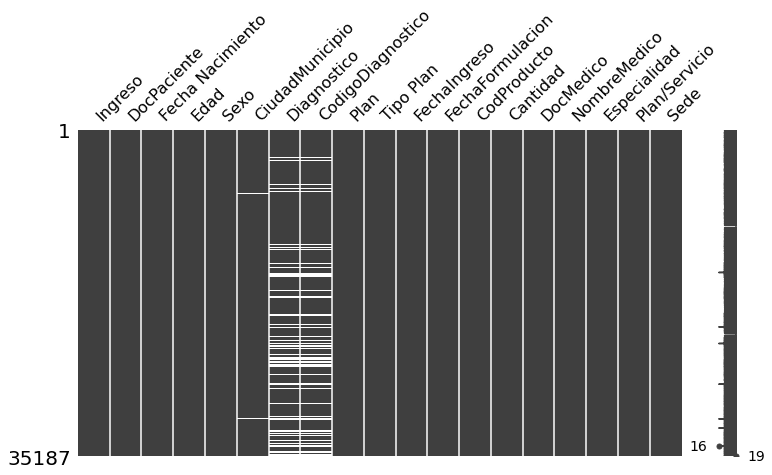

In [8]:
# check for missing values
import missingno as msg

msg.matrix(df_procedures, figsize=(12, 6))

In [9]:
# find number of missing values in 'Diagnostico'

na_diagnostic = df_procedures['Diagnostico'].isna().sum()
na_city = df_procedures['CiudadMunicipio'].isna().sum()

print(f'Missing Values in Diagnostico: {na_diagnostic}')
print(f'Missing values in CiudadMunicipio: {na_city}')

Missing Values in Diagnostico: 6426
Missing values in CiudadMunicipio: 20


In [10]:
# drop na values of CiudadMunicipio
df_procedures = df_procedures.dropna(subset=['CiudadMunicipio'])

# check shape
df_procedures.shape

(35167, 19)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### GroupBy of Relevant Features


In [11]:
# descriptive statistics
df_procedures.describe()

,Ingreso,Edad,Cantidad,DocMedico
count,35167.000000,35167.000000,35167.000000,3.516700e+04
mean,152045.264396,58.010351,1.349362,3.059599e+08
std,47766.591744,15.819550,0.754741,4.446890e+08
min,26720.000000,1.000000,1.000000,1.374997e+07
25%,117779.500000,48.000000,1.000000,1.906250e+07
50%,157990.000000,58.000000,1.000000,7.226080e+07
75%,191695.500000,69.000000,2.000000,1.017171e+09
max,225591.000000,101.000000,30.000000,1.235245e+09


#### Number of FMs Prescriptions by Site

In [12]:
# FM procedures by sede
fm_proced_sede = df_procedures.groupby(['Sede']).Cantidad.sum().reset_index()

fm_proced_sede['%_Prescripciones'] = (fm_proced_sede.Cantidad / fm_proced_sede.Cantidad.sum()) * 100
fm_proced_sede

,Sede,Cantidad,%_Prescripciones
0,COUNTRY,3952,8.328241
1,PARKWAY,922,1.942975
2,ZERENIA,41349,87.136746
3,ZERENIA - IBAGUE,106,0.223379
4,ZERENIA - MEDELLÍN,420,0.885086
5,ZERENIA - ARMENIA,61,0.128548
6,ZERENIA - BARRANQUILLA,89,0.187554
7,ZERENIA - BUCARAMANGA,177,0.373001
8,ZERENIA - CALI,256,0.539481
9,ZERENIA - MANIZALES,3,0.006322


is_Zerenia is a relevant feature since 87.13% of FMs prescribed come from this clinic

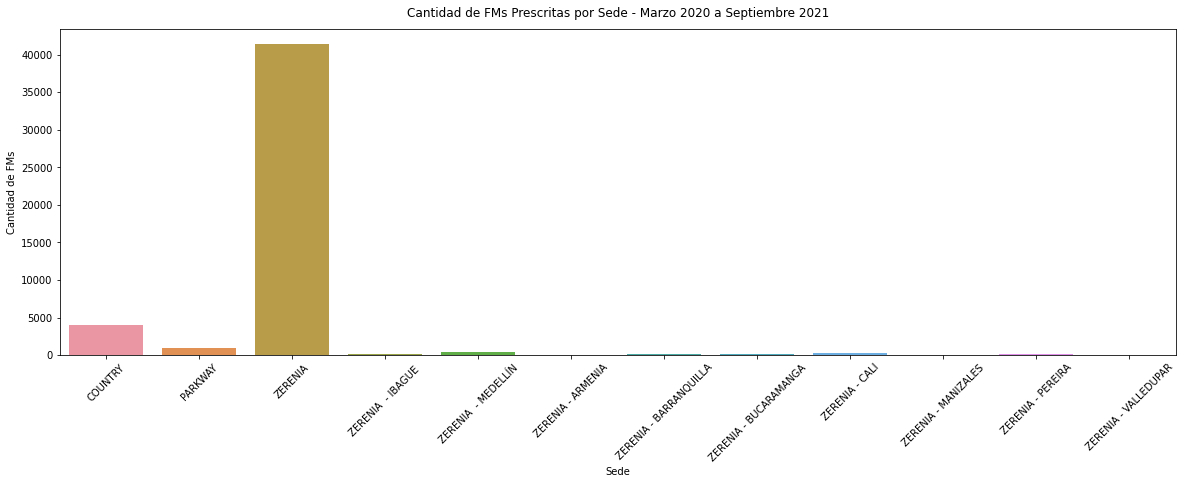

In [13]:
# barplot of prescribed FMs per Sede

f, ax = plt.subplots(figsize=(20,6))

sns.barplot(x=fm_proced_sede.Sede, y=fm_proced_sede.Cantidad)
# rotate x labels
plt.xticks(rotation=45)
plt.ylabel('Cantidad de FMs')

plt.title('Cantidad de FMs Prescritas por Sede - Marzo 2020 a Septiembre 2021', pad=12)
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Number of FMs Prescribed by Sex

In [14]:
# FM procedures by sexo
fm_proced_sex = df_procedures.groupby(['Sexo']).Cantidad.sum().reset_index()

fm_proced_sex['%_Prescripciones'] = (fm_proced_sex.Cantidad / fm_proced_sex.Cantidad.sum()) * 100
fm_proced_sex

,Sexo,Cantidad,%_Prescripciones
0,F,33715,71.049249
1,I,1,0.002107
2,M,13737,28.948644


The category 'I' of Sex is not going to be taken into account since Male(M) and Female(F) correspond to 99% of all patients prescribed 

In [15]:
# make dataframe without Sexo == I
df_procedures = df_procedures[df_procedures['Sexo'] != 'I']

df_procedures.Sexo.unique()

array(['F', 'M'], dtype=object)

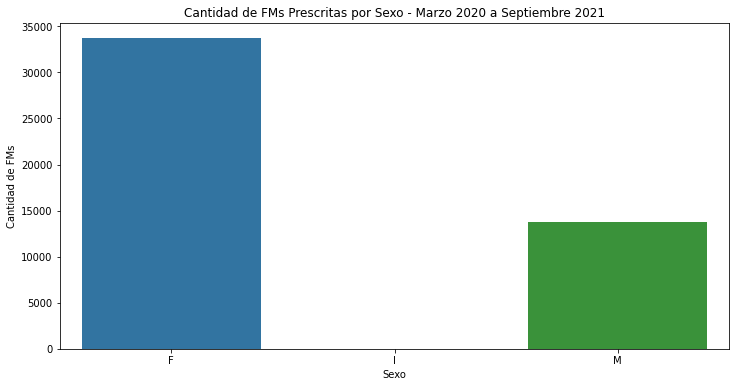

In [16]:
# barplot of prescribed FMs per Sexo

f, ax = plt.subplots(figsize=(12, 6))

sns.barplot(x=fm_proced_sex.Sexo, y=fm_proced_sex.Cantidad)
plt.ylabel('Cantidad de FMs')

plt.title('Cantidad de FMs Prescritas por Sexo - Marzo 2020 a Septiembre 2021')
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Number of FMs Prescribed by Service/Plan

In [17]:
# FMs prescribed by Plan/Servicio
fm_proced_plan = df_procedures.groupby(['Plan/Servicio']).Cantidad.sum().reset_index()

fm_proced_plan['%'] = (fm_proced_plan.Cantidad / fm_proced_plan.Cantidad.sum()) * 100
fm_proced_plan

,Plan/Servicio,Cantidad,%
0,Cannabis Medicinal,3068,6.465481
1,Consulta Dolor y Cuidados Paliativos,34436,72.570176
2,Dolor y Cuidados Paliativos Bloqueos,14,0.029503
3,Dolor y Cuidados Paliativos Lisis,1,0.002107
4,Fisioterapia,1,0.002107
5,Flete Formula Magistral,8,0.016859
6,Juntas Médicas,119,0.250780
7,Medicina Fisica y Rehabilitacion,6,0.012644
8,Medicina General,1,0.002107
9,Medicina General.,1495,3.150552


 The most relevant Services on the number of FMs prescribed are:
 - is_Dolor_Paliativo >> 72.57% of FMs prescribed
 - is_Psiquiatria >> 11.58% of FMs prescribed
 - is_Cannabis >> 6.46% of FMs prescribed
 - is_Neurology >> 3.57% of FMs prescribed

These Services correspond to 97.1% of FMs prescribed

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Number of FMs Prescribed by Product Type

In [18]:
# FMs prescribed by CodProducto
fm_proced_prod = df_procedures.groupby(['CodProducto']).Cantidad.sum().reset_index()

fm_proced_prod['%'] = (fm_proced_prod.Cantidad / fm_proced_prod.Cantidad.sum()) * 100
fm_proced_prod

,CodProducto,Cantidad,%
0,fm001,26989,56.876422
1,fm002,722,1.521538
2,fm003,17773,37.454691
3,fm004,1816,3.827025
4,fm005,152,0.320324


The most relevant product types on the number of FMs prescribed are:
- fm001 >> 56.87% of FMs prescribed
- fm003 >> 37.45% of FMs prescribed

These two product types correspond to 94.3% of FMs prescribed

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Number of FMs Prescribed by FechaFormulacion

In [19]:
# convert FechaFormulacion to datetime
df_procedures['FechaFormulacion'] = pd.to_datetime(df_procedures['FechaFormulacion'])

# check that the change was made
df_procedures.dtypes

Ingreso                       int64
DocPaciente                  object
Fecha Nacimiento             object
Edad                          int64
Sexo                         object
CiudadMunicipio              object
Diagnostico                  object
CodigoDiagnostico            object
Plan                         object
Tipo Plan                    object
FechaIngreso                 object
FechaFormulacion     datetime64[ns]
CodProducto                  object
Cantidad                      int64
DocMedico                     int64
NombreMedico                 object
Especialidad                 object
Plan/Servicio                object
Sede                         object
dtype: object

In [20]:
# create month and year column >> using pd.DatetimeIndex()
df_procedures['Month'] = pd.DatetimeIndex(df_procedures['FechaFormulacion']).month
df_procedures['Year'] = pd.DatetimeIndex(df_procedures['FechaFormulacion']).year

df_procedures.head()

,Ingreso,DocPaciente,Fecha Nacimiento,Edad,Sexo,CiudadMunicipio,Diagnostico,CodigoDiagnostico,Plan,Tipo Plan,FechaIngreso,FechaFormulacion,CodProducto,Cantidad,DocMedico,NombreMedico,Especialidad,Plan/Servicio,Sede,Month,Year
0,26720,41453437,30/09/1949,72,F,BOGOTÁ D.C.,(OSTEO)ARTROSIS PRIMARIAGENERALIZADA,M150,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53013811,LENIS RIVERA,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA,3,2020
1,26793,13352962,10/11/1960,61,M,BOGOTÁ D.C.,"TRASTORNO DE DISCO LUMBAR YOTROS, CON RADICULO...",M511,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53013811,LENIS RIVERA,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA,3,2020
2,26806,390646,1/08/1934,87,M,BOGOTÁ D.C.,NEURALGIA POSTHERPES ZOSTER(B02.2†),G530,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53013811,LENIS RIVERA,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA,3,2020
3,26928,19059029,13/09/1948,73,M,BOGOTÁ D.C.,NaN,NaN,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53007921,XIOMARA GARCIA,Neurologia,Neurologia,ZERENIA,3,2020
4,26846,41595666,20/09/1953,68,F,CAJICÁ,NaN,NaN,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53007921,XIOMARA GARCIA,Neurologia,Neurologia,ZERENIA,3,2020


In [21]:
# function to calcultate number of presribed FMs
def sum_avg_fm(df):
  calc={}
  calc['Numero_Prescripciones'] = len(df)
  calc['Cantidad_FMs'] = df['Cantidad'].sum()


  return pd.Series(calc, index=['Numero_Prescripciones', 'Cantidad_FMs', ])

In [22]:
# FMs prescribed by month/year
fm_proced_month = df_procedures.groupby(['Year', 'Month']).apply(sum_avg_fm).reset_index()

fm_proced_month['%_Cantidad'] = (fm_proced_month['Cantidad_FMs'] / fm_proced_month['Cantidad_FMs'].sum()) * 100
fm_proced_month

,Year,Month,Numero_Prescripciones,Cantidad_FMs,%_Cantidad
0,2020,3,8,9,0.018967
1,2020,4,85,88,0.185451
2,2020,5,127,131,0.276068
3,2020,6,357,381,0.802917
4,2020,7,600,614,1.293939
5,2020,8,953,978,2.061030
6,2020,9,1237,1295,2.729074
7,2020,10,1306,1439,3.032538
8,2020,11,1256,1447,3.049397
9,2020,12,1371,1602,3.376043


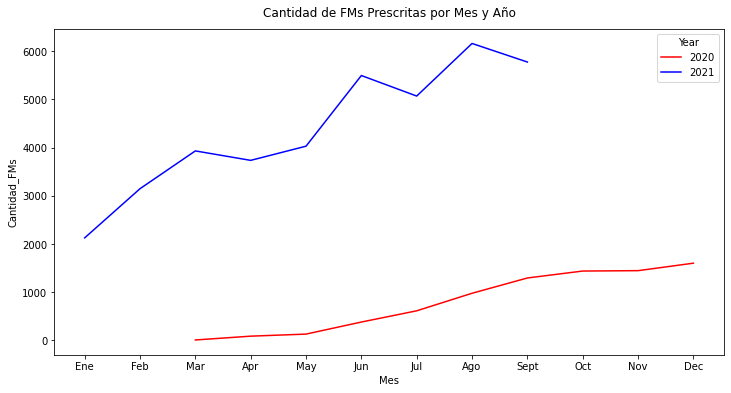

In [23]:
# lineplot of number of prescriptions by month

f, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(x=fm_proced_month['Month'], y=fm_proced_month['Cantidad_FMs'], hue=fm_proced_month['Year'], palette=['red', 'blue'])
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Ago', 'Sept', 'Oct', 'Nov', 'Dec'])

plt.xlabel('Mes')
plt.title('Cantidad de FMs Prescritas por Mes y Año', pad=12)
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Number of Prescribed FMs by Tipo Plan

In [24]:
# FMs prescribed by Tipo Plan
fm_proced_plan = df_procedures.groupby(['Tipo Plan']).Cantidad.sum().reset_index()

fm_proced_plan['%'] = (fm_proced_plan.Cantidad / fm_proced_plan.Cantidad.sum()) * 100
fm_proced_plan

,Tipo Plan,Cantidad,%
0,ARL,38,0.080081
1,EPS,31992,67.419708
2,Particular,15422,32.500211


The most relevant Tipo Plan on the number of FMs prescribed are:
- EPS >> 67.41% of FMs prescribed
- Particular >> 32.5% of FMs prescribed

These two Plans correspond to 99.91% of FMs prescribed. Plans with plan ARL are going to be removed from the df

In [25]:
# remove rows with type of plan == 'ARL'
df_procedures = df_procedures[df_procedures['Tipo Plan'] != 'ARL']

df_procedures['Tipo Plan'].unique()

array(['Particular', 'EPS'], dtype=object)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Number of Prescribed FMs by Diagnostico

In [26]:
# FMs prescribed by Diagnostico
fm_proced_diag = df_procedures.groupby(['Diagnostico']).Cantidad.sum().reset_index()

# sort values in descending order
fm_proced_diag = fm_proced_diag.sort_values(['Cantidad'], ascending=False)

fm_proced_diag['%'] = (fm_proced_diag.Cantidad / fm_proced_diag.Cantidad.sum()) * 100

# show 10 diagnostics with the most number of FMs prescribed
fm_proced_diag.head(10)

,Diagnostico,Cantidad,%
324,OTRO DOLOR CRONICO,16582,42.007397
118,DOLOR CRONICO INTRATABLE,9098,23.048082
463,TRASTORNO MIXTO DE ANSIEDAD YDEPRESION,2467,6.249683
475,TRASTORNOS DEL INICIO Y DELMANTENIMIENTO DEL S...,1679,4.253433
184,FIBROMIALGIA,1296,3.283174
2,(OSTEO)ARTROSIS PRIMARIAGENERALIZADA,1157,2.931043
141,ENFERMEDAD DE PARKINSON,730,1.849319
437,"TRASTORNO DE ANSIEDAD , NOESPECIFICADO",654,1.656787
241,LUMBAGO NO ESPECIFICADO,369,0.934793
439,TRASTORNO DE ANSIEDADGENERALIZADA,355,0.899326


The most relevant Diagnosticos on the number of FMs prescribed are:  
- Otro Dolor Cronico >> 42.00% of FMs prescribed
- Dolor Cronico Intratable >> 23.04% of FMs prescribed
- Trastorno Mixto de Ansiedad y Depresion >> 6.24% of FMs prescribed
- Insomnio >> 4.25% of FMs prescribed
- Fibromialgia >> 3.28% of FMs prescribed

These Diagnostics correspond to 78.81% of FMs prescribed which is more than the Q3 of the dataset

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Histogram of FMs Prescribed by Edad

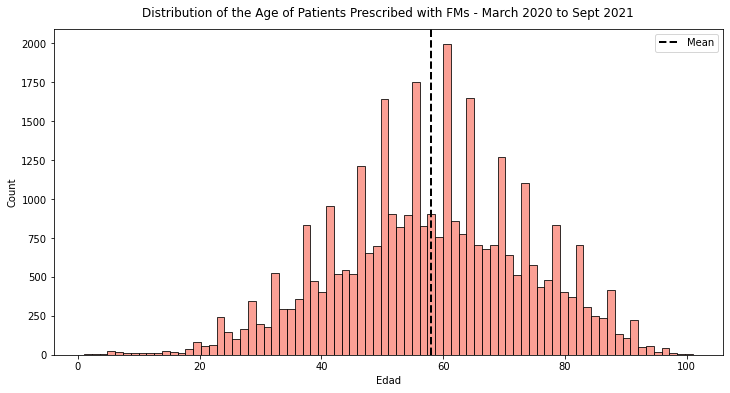

Skewness of Distribution: -0.14676919429814095
Mean of Patients Prescribed: 58.0236191343445
Medeian of Patients prescribed: 58.0


In [27]:
# plot histogram

f, ax = plt.subplots(figsize=(12, 6))

sns.histplot(data=df_procedures, x='Edad', color='salmon')
plt.axvline(df_procedures['Edad'].mean(), linestyle='dashed', linewidth=2, color='black', label='Mean')

plt.title('Distribution of the Age of Patients Prescribed with FMs - March 2020 to Sept 2021', pad=12)
plt.legend()
plt.show()

print(f'Skewness of Distribution: {df_procedures.Edad.skew()}')
print(f'Mean of Patients Prescribed: {df_procedures.Edad.mean()}')
print(f'Medeian of Patients prescribed: {df_procedures.Edad.median()}')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Number of Prescribed FMs by age_group

In [28]:
# bin Edad into age groups >> using pd.cut(df, bins=??)
df_procedures['age_group'] = pd.cut(df_procedures['Edad'], bins=4)

# check age_group
df_procedures.head()

,Ingreso,DocPaciente,Fecha Nacimiento,Edad,Sexo,CiudadMunicipio,Diagnostico,CodigoDiagnostico,Plan,Tipo Plan,FechaIngreso,FechaFormulacion,CodProducto,Cantidad,DocMedico,NombreMedico,Especialidad,Plan/Servicio,Sede,Month,Year,age_group
0,26720,41453437,30/09/1949,72,F,BOGOTÁ D.C.,(OSTEO)ARTROSIS PRIMARIAGENERALIZADA,M150,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53013811,LENIS RIVERA,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA,3,2020,"(51.0, 76.0]"
1,26793,13352962,10/11/1960,61,M,BOGOTÁ D.C.,"TRASTORNO DE DISCO LUMBAR YOTROS, CON RADICULO...",M511,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53013811,LENIS RIVERA,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA,3,2020,"(51.0, 76.0]"
2,26806,390646,1/08/1934,87,M,BOGOTÁ D.C.,NEURALGIA POSTHERPES ZOSTER(B02.2†),G530,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53013811,LENIS RIVERA,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA,3,2020,"(76.0, 101.0]"
3,26928,19059029,13/09/1948,73,M,BOGOTÁ D.C.,NaN,NaN,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53007921,XIOMARA GARCIA,Neurologia,Neurologia,ZERENIA,3,2020,"(51.0, 76.0]"
4,26846,41595666,20/09/1953,68,F,CAJICÁ,NaN,NaN,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53007921,XIOMARA GARCIA,Neurologia,Neurologia,ZERENIA,3,2020,"(51.0, 76.0]"


In [29]:
# FMs prescribed by age_group
fm_proced_age = df_procedures.groupby(['age_group']).Cantidad.sum().reset_index()

fm_proced_age['%'] = (fm_proced_age.Cantidad / fm_proced_age.Cantidad.sum()) * 100
fm_proced_age

,age_group,Cantidad,%
0,"(0.9, 26.0]",1316,2.775552
1,"(26.0, 51.0]",15520,32.732948
2,"(51.0, 76.0]",24895,52.505589
3,"(76.0, 101.0]",5683,11.985911


The most relevant Age Groups on the number of FMs prescribed are:   

- 51 to 76 years >> 52.5% of FMs prescribed
- 26 to 51 years >> 32.7% of FMs prescribed
- 76 to 101 years >> 11.9% of 

These three age groups correspond to 85.2% of FMs prescribed

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Number of Prescribed FMs by Ciudad

In [30]:
# FMs prescribed by city/location
fm_proced_city = df_procedures.groupby(['CiudadMunicipio']).Cantidad.sum().reset_index()
# sort values in descending order
fm_proced_city = fm_proced_city.sort_values('Cantidad', ascending=False)

fm_proced_city['%'] = (fm_proced_city.Cantidad / fm_proced_city.Cantidad.sum()) * 100
fm_proced_city.head(10)

,CiudadMunicipio,Cantidad,%
48,BOGOTÁ D.C.,32837,69.255916
401,SOACHA,2118,4.467035
244,MEDELLÍN,986,2.079555
235,MADRID,892,1.881301
261,MOSQUERA,580,1.223267
162,FUNZA,573,1.208504
149,FACATATIVÁ,548,1.155777
389,SANTIAGO DE CALI,546,1.151559
472,ZIPAQUIRÁ,545,1.149450
96,CHÍA,379,0.799342


The most relevant Cities on the number of FMs prescribed are:    
- Bogota >> 69.25% of FMs prescribed
- Soacha >> 4.46% of FMs prescribed
- Medellin >> 2.07% of FMs prescribed
- Madrid >> 1.88% of FMs prescribed
- Mosquera >> 1.22% of FMs prescribed

These cities correspond to 78.88% of the locations where FMs are prescribed, more than the Q3 of all the data

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Sales FMs

In [31]:
# check df
df_sales.head()

,ingreso,cedula,fecha_oc
0,26806,390646,2020-03-19
1,26793,13352962,2020-03-19
2,26928,19059029,2020-03-19
3,26891,31259698,2020-03-19
4,26720,41453437,2020-03-19


In [32]:
# rename ingreso to Ingreso
df_sales.rename(columns={'ingreso': 'Ingreso'}, inplace=True)

df_sales.head()

,Ingreso,cedula,fecha_oc
0,26806,390646,2020-03-19
1,26793,13352962,2020-03-19
2,26928,19059029,2020-03-19
3,26891,31259698,2020-03-19
4,26720,41453437,2020-03-19


In [33]:
# check shape
df_sales.shape

(28003, 3)

In [34]:
# check column types
df_sales.dtypes

Ingreso      int64
cedula      object
fecha_oc    object
dtype: object

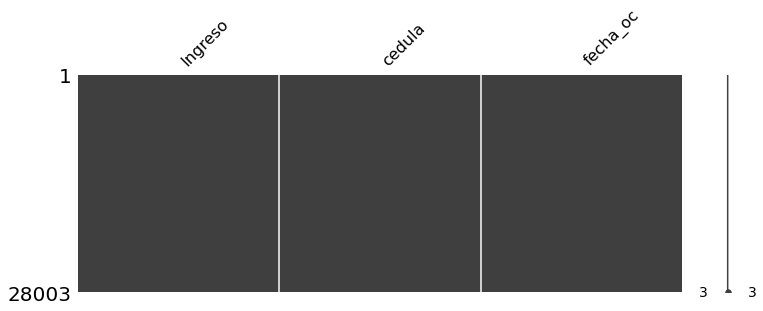

In [35]:
# check for missing values
msg.matrix(df_sales, figsize=(12,4))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Number of Prescriptions Sold by Year/Month 

In [36]:
# change fecha_oc type to datetime
df_sales['fecha_oc'] = pd.to_datetime(df_sales['fecha_oc'])

In [37]:
# check changes
df_sales.dtypes

Ingreso              int64
cedula              object
fecha_oc    datetime64[ns]
dtype: object

In [38]:
# create a month and year column
df_sales['month_sold'] = pd.DatetimeIndex(df_sales['fecha_oc']).month
df_sales['year_sold'] = pd.DatetimeIndex(df_sales['fecha_oc']).year 

df_sales.head()

,Ingreso,cedula,fecha_oc,month_sold,year_sold
0,26806,390646,2020-03-19,3,2020
1,26793,13352962,2020-03-19,3,2020
2,26928,19059029,2020-03-19,3,2020
3,26891,31259698,2020-03-19,3,2020
4,26720,41453437,2020-03-19,3,2020


In [39]:
# function to calculate number of prescriptions sold
def num_sold(df):
  calc = {}
  calc['prescriptions_sold'] = len(df)

  return pd.Series(calc, index=['prescriptions_sold'])

In [40]:
# prescriptions sold by year /month
presc_sold_month = df_sales.groupby(['year_sold', 'month_sold']).apply(num_sold).reset_index()

presc_sold_month['%'] = (presc_sold_month.prescriptions_sold / presc_sold_month.prescriptions_sold.sum()) * 100
presc_sold_month

,year_sold,month_sold,prescriptions_sold,%
0,2020,3,7,0.024997
1,2020,4,50,0.178552
2,2020,5,118,0.421383
3,2020,6,195,0.696354
4,2020,7,321,1.146306
5,2020,8,558,1.992644
6,2020,9,885,3.160376
7,2020,10,876,3.128236
8,2020,11,873,3.117523
9,2020,12,1096,3.913866


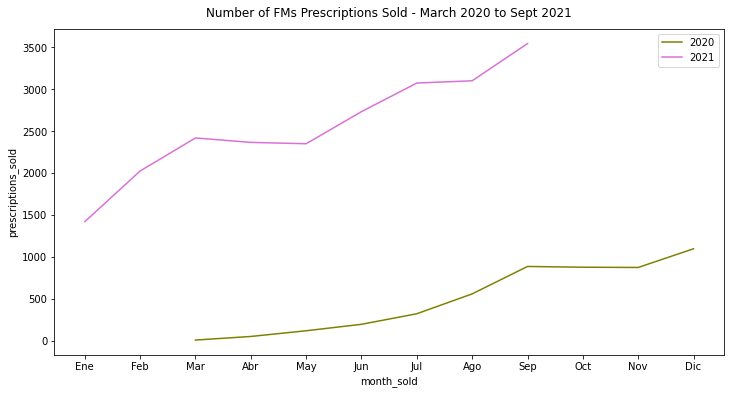

In [41]:
# lineplot of prescriptions sold by year / month

f, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(x=presc_sold_month.month_sold, y=presc_sold_month.prescriptions_sold,\
             hue=presc_sold_month.year_sold, palette=['olive', 'orchid'])

ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

plt.title('Number of FMs Prescriptions Sold - March 2020 to Sept 2021', pad=12)
plt.legend()
plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## DFs Merging

In [42]:
 # check size of df_procedures
 df_procedures.shape

(35141, 22)

In [43]:
# left join of df_procedures and df_sales on ingreso
df_merged = df_procedures.merge(df_sales, on='Ingreso', how='left')

df_merged.tail()

,Ingreso,DocPaciente,Fecha Nacimiento,Edad,Sexo,CiudadMunicipio,Diagnostico,CodigoDiagnostico,Plan,Tipo Plan,FechaIngreso,FechaFormulacion,CodProducto,Cantidad,DocMedico,NombreMedico,Especialidad,Plan/Servicio,Sede,Month,Year,age_group,cedula,fecha_oc,month_sold,year_sold
35136,225510,41726681,24/06/1948,73,F,BOGOTÁ D.C.,DOLOR CRONICO INTRATABLE,R521,FAMISANAR EPS - SUBSIDIADO,EPS,2021-09-29,2021-09-29,fm001,1,19062502,JORGE PATIÑO,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA,9,2021,"(51.0, 76.0]",NaN,NaT,NaN,NaN
35137,225514,51866868,15/12/1966,55,F,BOGOTÁ D.C.,DOLOR CRONICO INTRATABLE,R521,FAMISANAR EPS - CONTRIBUTIVO,EPS,2021-09-29,2021-09-29,fm001,1,19062502,JORGE PATIÑO,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA,9,2021,"(51.0, 76.0]",NaN,NaT,NaN,NaN
35138,225515,51811731,22/01/1966,55,F,BOGOTÁ D.C.,OTRO DOLOR CRONICO,R522,FAMISANAR EPS - SUBSIDIADO,EPS,2021-09-29,2021-09-29,fm003,1,19062502,JORGE PATIÑO,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA,9,2021,"(51.0, 76.0]",NaN,NaT,NaN,NaN
35139,225558,53063429,15/05/1984,37,F,MADRID,NaN,NaN,FAMISANAR EPS - SUBSIDIADO,EPS,2021-09-29,2021-09-29,fm001,4,55303292,MARIA ANGELICA SOLANO MANZANO,Medicina General,Consulta Dolor y Cuidados Paliativos,ZERENIA,9,2021,"(26.0, 51.0]",NaN,NaT,NaN,NaN
35140,225559,1070304763,19/06/1988,33,F,ZIPAQUIRÁ,NaN,NaN,FAMISANAR EPS - CONTRIBUTIVO,EPS,2021-09-29,2021-09-29,fm001,1,55303292,MARIA ANGELICA SOLANO MANZANO,Medicina General,Consulta Dolor y Cuidados Paliativos,ZERENIA,9,2021,"(26.0, 51.0]",NaN,NaT,NaN,NaN


In [44]:
# check merge df size
df_merged.shape

(35141, 26)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Selection Features & label in DF

In [45]:
# create column not_buyer >> if the column 'cedula' isna() >> True
df_merged['not_buyer'] = df_merged.cedula.isna()

# create column 'FM_buyer >> 1 if its not_buyer == False 
df_merged['FM_buyer'] = [1 if df_merged.iloc[index].not_buyer == False else 0 for index in df_merged.index]

In [46]:
df_merged.tail(3)

,Ingreso,DocPaciente,Fecha Nacimiento,Edad,Sexo,CiudadMunicipio,Diagnostico,CodigoDiagnostico,Plan,Tipo Plan,FechaIngreso,FechaFormulacion,CodProducto,Cantidad,DocMedico,NombreMedico,Especialidad,Plan/Servicio,Sede,Month,Year,age_group,cedula,fecha_oc,month_sold,year_sold,not_buyer,FM_buyer
35138,225515,51811731,22/01/1966,55,F,BOGOTÁ D.C.,OTRO DOLOR CRONICO,R522,FAMISANAR EPS - SUBSIDIADO,EPS,2021-09-29,2021-09-29,fm003,1,19062502,JORGE PATIÑO,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA,9,2021,"(51.0, 76.0]",NaN,NaT,NaN,NaN,True,0
35139,225558,53063429,15/05/1984,37,F,MADRID,NaN,NaN,FAMISANAR EPS - SUBSIDIADO,EPS,2021-09-29,2021-09-29,fm001,4,55303292,MARIA ANGELICA SOLANO MANZANO,Medicina General,Consulta Dolor y Cuidados Paliativos,ZERENIA,9,2021,"(26.0, 51.0]",NaN,NaT,NaN,NaN,True,0
35140,225559,1070304763,19/06/1988,33,F,ZIPAQUIRÁ,NaN,NaN,FAMISANAR EPS - CONTRIBUTIVO,EPS,2021-09-29,2021-09-29,fm001,1,55303292,MARIA ANGELICA SOLANO MANZANO,Medicina General,Consulta Dolor y Cuidados Paliativos,ZERENIA,9,2021,"(26.0, 51.0]",NaN,NaT,NaN,NaN,True,0


In [47]:
# selection of relevant features & label on new df
df_proced_sales = df_merged[['Ingreso', 'DocPaciente', 'age_group', 'Sexo', 'CiudadMunicipio', 'Diagnostico',\
                             'Tipo Plan', 'FechaFormulacion', 'CodProducto', 'Cantidad', 'Plan/Servicio', 'Sede',\
                             'Month', 'Year', 'month_sold', 'year_sold', 'FM_buyer']]

df_proced_sales.head()

,Ingreso,DocPaciente,age_group,Sexo,CiudadMunicipio,Diagnostico,Tipo Plan,FechaFormulacion,CodProducto,Cantidad,Plan/Servicio,Sede,Month,Year,month_sold,year_sold,FM_buyer
0,26720,41453437,"(51.0, 76.0]",F,BOGOTÁ D.C.,(OSTEO)ARTROSIS PRIMARIAGENERALIZADA,Particular,2020-03-19,fm001,1,Consulta Dolor y Cuidados Paliativos,ZERENIA,3,2020,3.0,2020.0,1
1,26793,13352962,"(51.0, 76.0]",M,BOGOTÁ D.C.,"TRASTORNO DE DISCO LUMBAR YOTROS, CON RADICULO...",Particular,2020-03-19,fm001,1,Consulta Dolor y Cuidados Paliativos,ZERENIA,3,2020,3.0,2020.0,1
2,26806,390646,"(76.0, 101.0]",M,BOGOTÁ D.C.,NEURALGIA POSTHERPES ZOSTER(B02.2†),Particular,2020-03-19,fm001,1,Consulta Dolor y Cuidados Paliativos,ZERENIA,3,2020,3.0,2020.0,1
3,26928,19059029,"(51.0, 76.0]",M,BOGOTÁ D.C.,NaN,Particular,2020-03-19,fm001,1,Neurologia,ZERENIA,3,2020,3.0,2020.0,1
4,26846,41595666,"(51.0, 76.0]",F,CAJICÁ,NaN,Particular,2020-03-19,fm001,1,Neurologia,ZERENIA,3,2020,3.0,2020.0,1


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Features Comparison Between Buyers & Not Buyers

#### FMs Bought Vs FMs Prescribed

In [48]:
# groupby 'FM_buyer'
fm_buyers = df_proced_sales.groupby(['FM_buyer']).Cantidad.sum().reset_index()

fm_buyers

,FM_buyer,Cantidad
0,0,9227
1,1,38187


In [49]:
# Total # of FMs prescribed
print(f'Total # of FMs prescribed from March 2020 to September 2021: {df_proced_sales.Cantidad.sum()}')

# Total # of FMs bought
print(f'Total # of FMs bought from March 2020 to September 2021: {38187}')

# Rate of Purchase
print(f'Rate of Purchase of FMs prescribed: {(round((38187/47414)*100, 2))}%')

Total # of FMs prescribed from March 2020 to September 2021: 47414
Total # of FMs bought from March 2020 to September 2021: 38187
Rate of Purchase of FMs prescribed: 80.54%


The Rate of Purchase of FMs prescribed from March 2020 to September 2021 is **80.54%**

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### FMs Bought by Sex

In [50]:
# groupby FM_buyer and sexo
fm_sex = df_proced_sales.groupby(['FM_buyer', 'Sexo']).Cantidad.sum().reset_index()

fm_sex

,FM_buyer,Sexo,Cantidad
0,0,F,6497
1,0,M,2730
2,1,F,27208
3,1,M,10979


In [51]:
# pivot table >> columns, index=rows, values
fm_sex = fm_sex.pivot(
    columns='FM_buyer',
    index='Sexo',
    values='Cantidad').reset_index()

# change column names
fm_sex.columns = ['sex', 'FMs_non_bought', 'FMs_bought']

fm_sex

,sex,FMs_non_bought,FMs_bought
0,F,6497,27208
1,M,2730,10979


In [52]:
# total number of prescriptions
fm_sex['FMs_prescribed'] = fm_sex.FMs_bought + fm_sex.FMs_non_bought

# % of quantity of FMs prescribed bought
fm_sex['%_purchase'] = (fm_sex.FMs_bought / fm_sex.FMs_prescribed) * 100

# sort values
fm_sex = fm_sex.sort_values('%_purchase', ascending=False)
fm_sex

,sex,FMs_non_bought,FMs_bought,FMs_prescribed,%_purchase
0,F,6497,27208,33705,80.723928
1,M,2730,10979,13709,80.086075


Even though females have bought 16,229 FMs more than males during the period 
of March 2020 to September 2021, their purchase rate by gender is both in 80%

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### FMs Bougth by Age Group

In [53]:
# groupby FM_buyer and age_group
fm_age = df_proced_sales.groupby(['FM_buyer', 'age_group']).Cantidad.sum().reset_index()

fm_age

,FM_buyer,age_group,Cantidad
0,0,"(0.9, 26.0]",342
1,0,"(26.0, 51.0]",3734
2,0,"(51.0, 76.0]",4341
3,0,"(76.0, 101.0]",810
4,1,"(0.9, 26.0]",974
5,1,"(26.0, 51.0]",11786
6,1,"(51.0, 76.0]",20554
7,1,"(76.0, 101.0]",4873


In [54]:
# pivot table 
fm_age = fm_age.pivot(
    columns='FM_buyer',
    index='age_group',
    values='Cantidad').reset_index()

# set column names
fm_age.columns = ['age_group', 'FMs_non_bought', 'FMs_bought']

fm_age

,age_group,FMs_non_bought,FMs_bought
0,"(0.9, 26.0]",342,974
1,"(26.0, 51.0]",3734,11786
2,"(51.0, 76.0]",4341,20554
3,"(76.0, 101.0]",810,4873


In [55]:
# create column FMs_prescribed
fm_age['FMs_prescribed'] = fm_age.FMs_non_bought + fm_age.FMs_bought

# create column %_purchase
fm_age['%_purchase'] = (fm_age.FMs_bought / fm_age.FMs_prescribed) * 100

# sort values
fm_age = fm_age.sort_values('%_purchase', ascending=False)
fm_age

,age_group,FMs_non_bought,FMs_bought,FMs_prescribed,%_purchase
3,"(76.0, 101.0]",810,4873,5683,85.746965
2,"(51.0, 76.0]",4341,20554,24895,82.562764
1,"(26.0, 51.0]",3734,11786,15520,75.940722
0,"(0.9, 26.0]",342,974,1316,74.012158


Even though the age group between 76 to 101 years have just 5683 FMs prescribed between March 2020 and September 2021 they have the highest rate of purchase with 85.7%.

They are followed by the age group of 51 to 76 years with a rate of purchase of 82.5% and the age group of 26 to 51 years old with 75.9% of FMs bought

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### FMs Bought by Plan Type

In [56]:
# groupby FM_buyer and Tipo Plan
fm_plan = df_proced_sales.groupby(['FM_buyer', 'Tipo Plan']).Cantidad.sum().reset_index()
fm_plan

,FM_buyer,Tipo Plan,Cantidad
0,0,EPS,6883
1,0,Particular,2344
2,1,EPS,25109
3,1,Particular,13078


In [57]:
# pivot table >> columns are FMs_non_bought & FMs_bought
fm_plan = fm_plan.pivot(
    columns='FM_buyer',
    index='Tipo Plan',
    values='Cantidad').reset_index()

# set columns
fm_plan.columns = ['Plan_type', 'FMs_non_bought', 'FMs_bought']

fm_plan

,Plan_type,FMs_non_bought,FMs_bought
0,EPS,6883,25109
1,Particular,2344,13078


In [58]:
# create column FMs_prescribed
fm_plan['FMs_prescribed'] = fm_plan.FMs_non_bought + fm_plan.FMs_bought

# create column %_purchase
fm_plan['%_purchase'] = (fm_plan.FMs_bought / fm_plan.FMs_prescribed) * 100

# sort values
fm_plan = fm_plan.sort_values('%_purchase', ascending=False)
fm_plan

,Plan_type,FMs_non_bought,FMs_bought,FMs_prescribed,%_purchase
1,Particular,2344,13078,15422,84.800934
0,EPS,6883,25109,31992,78.485246


Even though the number of FMs prescribed by *EPS* exceeds in 107% the number of FMs prescribed by *Particular*, the rate of purchase of the latter (84.8%) is 6.4% greater than the former (78.4%).

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### FMs Bought by City

In [59]:
# groupby FM_buyer and CiudadMunicipio
fm_city = df_proced_sales.groupby(['FM_buyer', 'CiudadMunicipio']).Cantidad.sum().reset_index()

fm_city.head()

,FM_buyer,CiudadMunicipio,Cantidad
0,0,ACACÍAS,1
1,0,ACAPULCO,1
2,0,AGUA DE DIOS,2
3,0,AGUACHICA,1
4,0,AGUAS FRÍAS - MEDELLÍN,1


In [60]:
# pivot table
fm_city = fm_city.pivot(
    columns='FM_buyer',
    index='CiudadMunicipio',
    values='Cantidad').reset_index()

# set column names
fm_city.columns = ['City', 'FMs_non_bought', 'FMs_bought']

In [61]:
# create FMs_prescribed
fm_city['FMs_prescribed'] = fm_city.FMs_bought + fm_city.FMs_non_bought

# create %_purchase
fm_city['%_purchase'] = (fm_city.FMs_bought / fm_city.FMs_prescribed) * 100

# sort values
fm_city = fm_city.sort_values(by='FMs_prescribed', ascending=False)

fm_city.head()

,City,FMs_non_bought,FMs_bought,FMs_prescribed,%_purchase
48,BOGOTÁ D.C.,6045.0,26792.0,32837.0,81.590888
401,SOACHA,469.0,1649.0,2118.0,77.856468
244,MEDELLÍN,168.0,818.0,986.0,82.961460
235,MADRID,202.0,690.0,892.0,77.354260
261,MOSQUERA,95.0,485.0,580.0,83.620690


Of the 5 cities/towns with the highest number of FMs prescribed Mosquera has the highest purchase rate with 83.6%, followed by Medellin and Bogotá with 82.9% and 81.5% respectively. 

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### FMs Bought by Diagnostic

In [62]:
# groupby 'FM_buyer' and 'Diagnostico'
fm_diagnostic = df_proced_sales.groupby(['FM_buyer', 'Diagnostico']).Cantidad.sum().reset_index()

fm_diagnostic.head()

,FM_buyer,Diagnostico,Cantidad
0,0,(OSTEO)ARTROSIS EROSIVA,3
1,0,(OSTEO)ARTROSIS PRIMARIAGENERALIZADA,164
2,0,"ALCOHOLISMO, NIVEL DE INTOXICACIONNO ESPECIFICADO",2
3,0,AMPUTACION DE MIEMBRO(S),2
4,0,"AMPUTACION TRAUMATICA DE LAPIERNA, NIVEL NO ES...",1


In [63]:
# pivot table
fm_diagnostic = fm_diagnostic.pivot(
    columns='FM_buyer',
    index='Diagnostico',
    values='Cantidad').reset_index()

# set column names
fm_diagnostic.columns = ['Diagnostic', 'FMs_non_bought', 'FMs_bought']

In [64]:
# create 'FMs_prescribed'
fm_diagnostic['FMs_precribed'] = fm_diagnostic.FMs_bought + fm_diagnostic.FMs_non_bought

# craete '%_purchase'
fm_diagnostic['%_purchase'] = (fm_diagnostic.FMs_bought / fm_diagnostic.FMs_precribed) * 100

# sort values
fm_diagnostic = fm_diagnostic.sort_values(by='FMs_precribed', ascending=False)

fm_diagnostic.head()

,Diagnostic,FMs_non_bought,FMs_bought,FMs_precribed,%_purchase
324,OTRO DOLOR CRONICO,2759.0,13823.0,16582.0,83.361476
118,DOLOR CRONICO INTRATABLE,1744.0,7354.0,9098.0,80.830952
463,TRASTORNO MIXTO DE ANSIEDAD YDEPRESION,449.0,2018.0,2467.0,81.799757
475,TRASTORNOS DEL INICIO Y DELMANTENIMIENTO DEL S...,308.0,1371.0,1679.0,81.655747
184,FIBROMIALGIA,256.0,1040.0,1296.0,80.246914


Of the 5 Diagnostics with the most FMs precribed the one with the highest purchase rate is 'OTRO DOLOR CRONICO' with 83.3% followed by 'TRASTORNO MIXTO DE ANSIEDAD Y DEPRESION' and 'DOLOR CRONICO INTRATABLE' with 81.7% and 80.8%

#### FMs Bought by Product

In [65]:
# groupby FM_buyer and CodProducto
fm_product = df_proced_sales.groupby(['FM_buyer', 'CodProducto']).Cantidad.sum().reset_index()

fm_product

,FM_buyer,CodProducto,Cantidad
0,0,fm001,5429
1,0,fm002,113
2,0,fm003,3331
3,0,fm004,334
4,0,fm005,20
5,1,fm001,21531
6,1,fm002,608
7,1,fm003,14434
8,1,fm004,1482
9,1,fm005,132


In [66]:
# pivot table
fm_product = fm_product.pivot(
    columns='FM_buyer',
    index='CodProducto',
    values='Cantidad').reset_index()

# set column names
fm_product.columns = ['Product', 'FMs_non_bought', 'FMs_bought']
fm_product

,Product,FMs_non_bought,FMs_bought
0,fm001,5429,21531
1,fm002,113,608
2,fm003,3331,14434
3,fm004,334,1482
4,fm005,20,132


In [67]:
# create column 'FMs_prescribed'
fm_product['FMs_prescribed'] = fm_product.FMs_bought + fm_product.FMs_non_bought

# create column '%_purchase'
fm_product['%_purchase'] = (fm_product.FMs_bought / fm_product.FMs_prescribed) * 100

# sort values
fm_product.sort_values('%_purchase', ascending=False)

fm_product

,Product,FMs_non_bought,FMs_bought,FMs_prescribed,%_purchase
0,fm001,5429,21531,26960,79.862760
1,fm002,113,608,721,84.327323
2,fm003,3331,14434,17765,81.249648
3,fm004,334,1482,1816,81.607930
4,fm005,20,132,152,86.842105


Even though fm001 is the type of product which has the highest number of FMs prescribed it has the lowest rate of purchase of the 5 products with 79.8%. Interestingly enough, fm005 and fm002 the two products which have the highest concentration of THC also have the highest rate of purchase with 86.8% and 84.32% respectively. 

Below you will find a chi-square test to see if the different type of products have statistically significant differences in the purchase rate

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Statistical Significance - Product Type & Purchase Rate

- A Chi-Square test will be run to see if the different type of products have statiscally significant differences in the purchase rate

||FMs_bought|FMs_non_bought|
|-|-|-|
|fm001|?|?|
|fm002|?|?|



In [68]:
# import chi-square package
from scipy.stats import chi2_contingency

In [69]:
# fm_product
fm_product

,Product,FMs_non_bought,FMs_bought,FMs_prescribed,%_purchase
0,fm001,5429,21531,26960,79.862760
1,fm002,113,608,721,84.327323
2,fm003,3331,14434,17765,81.249648
3,fm004,334,1482,1816,81.607930
4,fm005,20,132,152,86.842105


In [70]:
# contingency table fm001 & fm002
contingency_prod = [[21531, 5429],
                    [608, 113]]

# Hypothesis
print('Ho >> No association between fm001 and fm002 purchase rates')
print('H1 >> There is an association between fm001 and fm002 purchase rates', '\n')

chi2, pval, dof, expected = chi2_contingency(contingency_prod)

print('Expected values if there was NO Association:')
print(expected, '\n')

print(f'P-Value: {pval}')
print('Significant Threshold: 0.05', '\n')

print('We can conclude with a 95% confidence that there IS an association between fm001 and fm002 purchase rates')
print('fm002 are shown to have a statiscally significant higher purchase rate than fm001')
print('This can be because FMs with THC allows to aliviate pain on the patients with higher degree pathologies')

Ho >> No association between fm001 and fm002 purchase rates
H1 >> There is an association between fm001 and fm002 purchase rates 

Expected values if there was NO Association:
[[21562.35107113  5397.64892887]
 [  576.64892887   144.35107113]] 

P-Value: 0.003621260199950411
Significant Threshold: 0.05 

We can conclude with a 95% confidence that there IS an association between fm001 and fm002 purchase rates
fm002 are shown to have a statiscally significant higher purchase rate than fm001
This can be because FMs with THC allows to aliviate pain on the patients with higher degree pathologies


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Statistical Significance - Age Group & Purchase Rate

- A Chi-Square test will be run to see if the age groups have statiscally significant differences in the purchase rate

||FMs_bought|FMs_non_bought|
|-|-|-|
|76-101|?|?|
|26-51|?|?|

In [71]:
fm_age

,age_group,FMs_non_bought,FMs_bought,FMs_prescribed,%_purchase
3,"(76.0, 101.0]",810,4873,5683,85.746965
2,"(51.0, 76.0]",4341,20554,24895,82.562764
1,"(26.0, 51.0]",3734,11786,15520,75.940722
0,"(0.9, 26.0]",342,974,1316,74.012158


In [72]:
# contingency table
contingency_age = [[4873, 810],
                   [11786, 3734]]

# Hypothesis
print('Ho >> No association between the age groups [76-101] and [26-51] purchase rates')
print('H1 >> There is an association between the age groups [76-101] and [26-51] purchase rates', '\n')

chi2, pval, dof, expected = chi2_contingency(contingency_age)

print('Expected values if there is NO Association:')
print(expected, '\n')

print(f'P-Value: {pval}')
print('Significant Threshold: 0.05', '\n')

print('We can conclude with a 95% confidence that there IS an association between the age groups [76-101] and [26-51]purchase rates')
print('Even though the age group [26-51] have been the least prescribed of the two, they are shown to have a statiscally \nhigher purchase rate than the age group of [76-101]')

Ho >> No association between the age groups [76-101] and [26-51] purchase rates
H1 >> There is an association between the age groups [76-101] and [26-51] purchase rates 

Expected values if there is NO Association:
[[ 4465.08027166  1217.91972834]
 [12193.91972834  3326.08027166]] 

P-Value: 1.7877118355990216e-53
Significant Threshold: 0.05 

We can conclude with a 95% confidence that there IS an association between the age groups [76-101] and [26-51]purchase rates
Even though the age group [26-51] have been the least prescribed of the two, they are shown to have a statiscally 
higher purchase rate than the age group of [76-101]


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Feature Encoding

#### Sex Encoding 
- F >> female will be mapped to 0 >> 80.7% purchase rate
- M >> male will be mapped to 1 >> 80 % purchase rate



#### Age Encoding
- is_51_76 >> 1 if True >> 82.5% purchase rate
- is_76_101 >> 1 if True >> 85.74% purchase rate

#### Plan Type Encoding is_plan_particular
- EPS >> will be mapped to 0 >> 78.48% purchase rate
- Particular >> will be mapped to 1 >> 84.8% purchase rate

#### Product Type Encoding 
- is_fm002 (THC) >> 1 >> 84.3% purchase rate
- is_fm001 (CBD) >> 1 >> 79.8% purchase rate

#### City/Town Encoding
- is_Mosquera >> 1 >> 83.6% purchase rate 
- is_Medellin >> 1 >> 82.9% purchase rate
- is_Bogota >> 1 >> 81.5% purchase rate

#### Diagnostic Encoding
- other cronic_pain >> 1 >> 83.3% purchase rate
- is_anxiety_depression >> 1 >> 81.7% purchase rate
- is_cronic_pain_uncu >> 1 >> 80.8% purchase rate




In [ ]:
# create sex column
df_proced_sales['Sex'] = [0 if df_proced_sales.loc[index, 'Sexo'] == 'F' else 1 for index in df_proced_sales.index]

# create is_51_76
df_proced_sales['is_51_76'] = [1 if df_proced_sales.loc[index, 'age_group'] == pd.Interval(51.0, 76.0) else 0\
                              for index in df_proced_sales.index]

# create is_76_101
df_proced_sales['is_76_101'] = [1 if df_proced_sales.loc[index, 'age_group'] == pd.Interval(76.0, 101.0) else 0\
                                for index in df_proced_sales.index]

# create is_plan_particular
df_proced_sales['is_plan_particular'] = [1 if df_proced_sales.loc[index, 'Tipo Plan'] == 'Particular' else 0\
                                         for index in df_proced_sales.index]

# create is_fm002
df_proced_sales['is_fm002'] = [1 if df_proced_sales.loc[index, 'CodProducto'] == 'fm002' else 0\
                               for index in df_proced_sales.index]

# create is_fm001
df_proced_sales['is_fm001'] = [1 if df_proced_sales.loc[index, 'CodProducto'] == 'fm001' else 0\
                              for index in df_proced_sales.index]

# create is_Medellin
df_proced_sales['is_Medellin'] = [1 if df_proced_sales.loc[index, 'CiudadMunicipio'] == 'MEDELLÍN' else 0\
                                  for index in df_proced_sales.index]

# create is_Mosquera
df_proced_sales['is_Mosquera'] = [1 if df_proced_sales.loc[index, 'CiudadMunicipio'] == 'MOSQUERA' else 0\
                                  for index in df_proced_sales.index]

# create is_Bogota
df_proced_sales['is_Bogota'] = [1 if df_proced_sales.loc[index, 'CiudadMunicipio'] == 'BOGOTÁ D.C.' else 0\
                                for index in df_proced_sales.index]

# create other_cronic_pain
df_proced_sales['is_cronic_pain'] = [1 if df_proced_sales.loc[index, 'Diagnostico'] == 'OTRO DOLOR CRONICO' else 0\
                                     for index in df_proced_sales.index]
# create anxiety_depression
df_proced_sales['is_anxiety_depres'] = [1 if df_proced_sales.loc[index, 'Diagnostico'] == 'TRASTORNO MIXTO DE ANSIEDAD YDEPRESION'\
                                        else 0 for index in df_proced_sales.index]

# create cronic_pain_uncu
df_proced_sales['is_cronic_pain_uncu'] = [1 if df_proced_sales.loc[index, 'Diagnostico'] == 'DOLOR CRONICO INTRATABLE' else 0\
                                       for index in df_proced_sales.index]



In [74]:
# check column creation
df_proced_sales.head()

,Ingreso,DocPaciente,age_group,Sexo,CiudadMunicipio,Diagnostico,Tipo Plan,FechaFormulacion,CodProducto,Cantidad,Plan/Servicio,Sede,Month,Year,month_sold,year_sold,FM_buyer,Sex,is_51_76,is_76_101,is_plan_particular,is_fm002,is_fm001,is_Medellin,is_Mosquera,is_Bogota,is_cronic_pain,is_anxiety_depres,is_cronic_pain_uncu
0,26720,41453437,"(51.0, 76.0]",F,BOGOTÁ D.C.,(OSTEO)ARTROSIS PRIMARIAGENERALIZADA,Particular,2020-03-19,fm001,1,Consulta Dolor y Cuidados Paliativos,ZERENIA,3,2020,3.0,2020.0,1,0,1,0,1,0,1,0,0,1,0,0,0
1,26793,13352962,"(51.0, 76.0]",M,BOGOTÁ D.C.,"TRASTORNO DE DISCO LUMBAR YOTROS, CON RADICULO...",Particular,2020-03-19,fm001,1,Consulta Dolor y Cuidados Paliativos,ZERENIA,3,2020,3.0,2020.0,1,1,1,0,1,0,1,0,0,1,0,0,0
2,26806,390646,"(76.0, 101.0]",M,BOGOTÁ D.C.,NEURALGIA POSTHERPES ZOSTER(B02.2†),Particular,2020-03-19,fm001,1,Consulta Dolor y Cuidados Paliativos,ZERENIA,3,2020,3.0,2020.0,1,1,0,1,1,0,1,0,0,1,0,0,0
3,26928,19059029,"(51.0, 76.0]",M,BOGOTÁ D.C.,NaN,Particular,2020-03-19,fm001,1,Neurologia,ZERENIA,3,2020,3.0,2020.0,1,1,1,0,1,0,1,0,0,1,0,0,0
4,26846,41595666,"(51.0, 76.0]",F,CAJICÁ,NaN,Particular,2020-03-19,fm001,1,Neurologia,ZERENIA,3,2020,3.0,2020.0,1,0,1,0,1,0,1,0,0,0,0,0,0


In [75]:
# features & label df
df_features_labels = df_proced_sales[['Ingreso', 'Sex', 'is_51_76', 'is_76_101', 'is_plan_particular', 'is_fm002',\
                                      'is_fm001', 'is_Medellin', 'is_Mosquera', 'is_Bogota', 'is_cronic_pain',\
                                      'is_anxiety_depres', 'is_cronic_pain_uncu', 'FM_buyer']]

df_features_labels.head()

,Ingreso,Sex,is_51_76,is_76_101,is_plan_particular,is_fm002,is_fm001,is_Medellin,is_Mosquera,is_Bogota,is_cronic_pain,is_anxiety_depres,is_cronic_pain_uncu,FM_buyer
0,26720,0,1,0,1,0,1,0,0,1,0,0,0,1
1,26793,1,1,0,1,0,1,0,0,1,0,0,0,1
2,26806,1,0,1,1,0,1,0,0,1,0,0,0,1
3,26928,1,1,0,1,0,1,0,0,1,0,0,0,1
4,26846,0,1,0,1,0,1,0,0,0,0,0,0,1


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



### Features Correlation

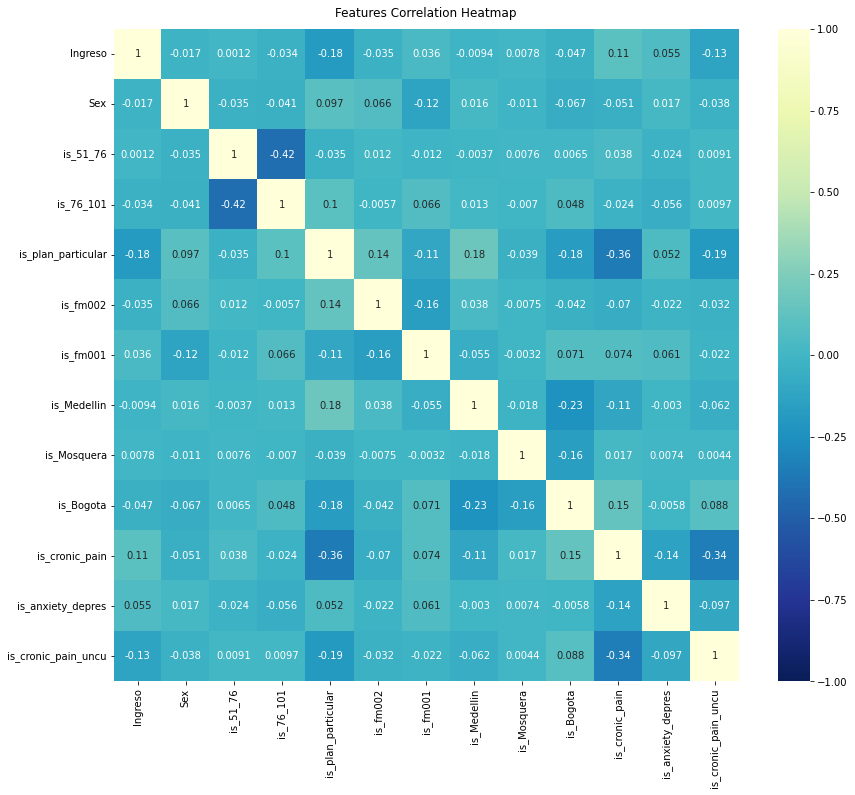

In [113]:
# heatmap of features correlation

f, ax = plt.subplots(figsize=(14, 12))

# df of only features
df_corr = df_features_labels[df_features_labels.columns[:-1]]
sns.heatmap(df_corr.corr(), vmin=-1, vmax=1, annot=True, cmap='YlGnBu_r')

plt.title('Features Correlation Heatmap', pad=12)

plt.show()

As can be seen in the Correlation Heatmap above, there is none or little *Multicolinearity* between the features, which makes it suitable for a Logistic Regression Model.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Logistic Regression Model

Supervised Classification Algorithm that uses regression to predict if a data sample belongs to a specific category or class. For this case it will classify a patient prescribed with FM as a buyer(1) or non_buyer(0)

- Calculate Log Odds >> the probability of a sample belonging to the positive class (patient bought FM precribed)
  - odds = P(event occurring) / P(event not occurring)
  - Z = b0 + b1x1 + ... bnXn

- Pass Log Odds to Sigmoid Function >> map Log Odds Z to the range [0, 1]
  - h(Z) = 1 / (1 + exp**-Z) 

### Features for the Model

In [77]:
# features df
features = df_features_labels[['Sex', 'is_51_76', 'is_76_101', 'is_plan_particular', 'is_fm002',\
                               'is_fm001', 'is_Medellin', 'is_Mosquera', 'is_Bogota', 'is_cronic_pain',\
                               'is_anxiety_depres', 'is_cronic_pain_uncu']]
features.head()

,Sex,is_51_76,is_76_101,is_plan_particular,is_fm002,is_fm001,is_Medellin,is_Mosquera,is_Bogota,is_cronic_pain,is_anxiety_depres,is_cronic_pain_uncu
0,0,1,0,1,0,1,0,0,1,0,0,0
1,1,1,0,1,0,1,0,0,1,0,0,0
2,1,0,1,1,0,1,0,0,1,0,0,0
3,1,1,0,1,0,1,0,0,1,0,0,0
4,0,1,0,1,0,1,0,0,0,0,0,0


In [78]:
# descriptive statistics of features
features.describe()

,Sex,is_51_76,is_76_101,is_plan_particular,is_fm002,is_fm001,is_Medellin,is_Mosquera,is_Bogota,is_cronic_pain,is_anxiety_depres,is_cronic_pain_uncu
count,35141.000000,35141.000000,35141.000000,35141.000000,35141.000000,35141.000000,35141.000000,35141.00000,35141.000000,35141.000000,35141.000000,35141.000000
mean,0.290515,0.534020,0.132466,0.386187,0.018952,0.561339,0.025810,0.01181,0.675080,0.326456,0.037648,0.193648
std,0.454007,0.498848,0.339002,0.486881,0.136358,0.496230,0.158571,0.10803,0.468351,0.468923,0.190347,0.395162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


### Labels for the Model

In [79]:
# labels df
labels = df_features_labels[['FM_buyer']]

labels.head()

,FM_buyer
0,1
1,1
2,1
3,1
4,1


In [80]:
# check labels shape
labels.shape

(35141, 1)

In [81]:
# turn labels into numpy array
labels = np.array(labels)
labels

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [82]:
# change shape to (-1,) so it can be fed to the model
labels = labels.reshape(-1,)
labels.shape

(35141,)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


### Train Test Split

In [83]:
# split data into train and test
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=100)

# check length of features_test and labels_test
print(f'features_test length: {len(features_test)}')
print(f'labels_test length: {len(labels_test)}')

features_test length: 7029
labels_test length: 7029


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Model Creation

In [84]:
from sklearn.linear_model import LogisticRegression

# create model
classifier = LogisticRegression()

# train model
classifier.fit(features_train, labels_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
# get coefficients and intercept
coefficients = classifier.coef_
intercept = classifier.intercept_

# print values
print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficients}')

Intercept: [0.42506931]
Coefficients: [[-0.05987961  0.40069427  0.64283813  0.84936957  0.02910549 -0.13491784
   0.07972121  0.33604216  0.24590042  0.60200725  0.3013485   0.38185602]]


In [86]:
# zip coefficients to features
list(zip(['Sex', 'is_51_76', 'is_76_101', 'is_plan_particular', 'is_fm002',\
         'is_fm001', 'is_Medellin', 'is_Mosquera', 'is_Bogota', 'is_cronic_pain',\
         'is_anxiety_depres', 'is_cronic_pain_uncu'], coefficients[0]))

[('Sex', -0.05987961496955512),
 ('is_51_76', 0.4006942738793421),
 ('is_76_101', 0.642838126719041),
 ('is_plan_particular', 0.8493695727546604),
 ('is_fm002', 0.02910548551204522),
 ('is_fm001', -0.13491784280527663),
 ('is_Medellin', 0.07972121137729565),
 ('is_Mosquera', 0.33604215777316604),
 ('is_Bogota', 0.24590041643172478),
 ('is_cronic_pain', 0.6020072541830324),
 ('is_anxiety_depres', 0.3013485045694603),
 ('is_cronic_pain_uncu', 0.381856023784964)]

The features with the highest influence in classifying a patient with FM prescribed as a buyer (1) is **is_plan_particular** with a coefficient of 0.84 followed by **is_76_101** and **is_cronic_pain** with coefficients of 0.64 and 0.60 respectively.

In [87]:
# predict features_test buyers
# threshold = 0.5 >> makes the decision on what class the sample belongs to
prediction = classifier.predict(features_test)

prediction

array([1, 1, 1, ..., 1, 1, 1])

In [88]:
# check to see if there are class 0 in prediction
for el in prediction:
  if el == 0:
    print(el)

A threshold of p = 0.5 outputs all patients to class 1, this shows that the p is too small, the probability of a patient buying a prescribed FM must be higher

In [89]:
# model accuracy on training data
train_score = classifier.score(features_train, labels_train)
print(f'Train Score: {train_score}')

# model accuracy on test data
test_score = classifier.score(features_test, labels_test)
print(f'Test score: {test_score}')

Train Score: 0.7942871371656233
Test score: 0.7925736235595391


The model has an Accuracy of 0.7925. This means that on average 79.25% of the times the classifier will correctly classify a new patient prescribed with FM as a buyer(1) or non_buyer(0)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Model Adjustment

In [90]:
# increase the threshold of classification to 0.7
predict_new_threshold = (classifier.predict_proba(features_test)[:,1]>=0.7).astype(int)

predict_new_threshold

array([1, 0, 1, ..., 1, 1, 1])

In [91]:
# calculate new accuracies with new threshold
test_score = classifier.score(features_test, predict_new_threshold)
print(f'Test Score: {test_score}')

Test Score: 0.9014084507042254


After the adjustment of the model, it has an accuracy of 0.90. This means an increase of 0.11 in accuracy, after changing the threshold from 0.5 to 0.7. The model now, on average, will classify correctly 90% of the times a new patient prescribed with FM as a buyer(1) or non_buyer(0).


In [92]:
# vector of probabilities
probabilities  = classifier.predict_proba(features_test)

print('  Non_Buyer  |  Buyer   ')
# print first 20 probabilities
for i in range(0, 21):
  print(probabilities[i])


  Non_Buyer  |  Buyer   
[0.0977585 0.9022415]
[0.36910649 0.63089351]
[0.07425863 0.92574137]
[0.28245536 0.71754464]
[0.29382753 0.70617247]
[0.42796679 0.57203321]
[0.13456861 0.86543139]
[0.17650398 0.82349602]
[0.19882722 0.80117278]
[0.17671656 0.82328344]
[0.05923478 0.94076522]
[0.16606286 0.83393714]
[0.21874807 0.78125193]
[0.11626763 0.88373237]
[0.21874807 0.78125193]
[0.33827974 0.66172026]
[0.122563 0.877437]
[0.22119387 0.77880613]
[0.29066454 0.70933546]
[0.19344625 0.80655375]
[0.36910649 0.63089351]


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Confusion Matrix

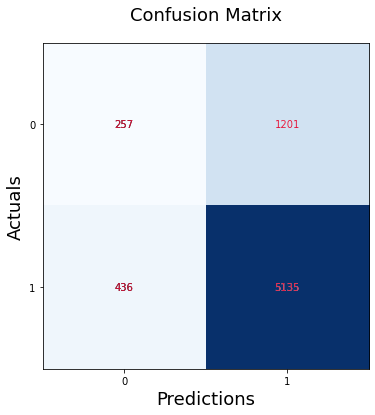

In [93]:
# confusion matrix to compare the test labels to the prediction
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(labels_test, predict_new_threshold)

# plot confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)

# change color of occurences
for i in range(2):
  for e in range(2):
    ax.text(e, i, cm[i, e], ha='center', va='center', color='crimson')


plt.title('Confusion Matrix', fontsize=18)
plt.show()

- **True Positives >> 5135**
  - Number of times the model predicted the patient will buy the FM prescribed and he bought it

- **True Negatives >> 257**
  - Number of times the model predicted the patient wouldn't buy the FM prescribed and he didn't

- **False Positives >> 1201**
  - Number of times the model predicted the patient would buy the FM prescribed and he didn't

- **False Negatives >> 436**
  - Number of times the model predicted the patient wouldn't buy the FM prescribed and he did

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Recall, Precision & F1 Score

In [94]:
# RECALL >> % of relevant items the classifier found
# true positives / (true positive + false negative)

recall = 5135 / (5135 + 436)
print(f'Recall: {recall}')

# PRECISION >> % of times the model predicted the patient will buy the FM presribed
# true positives / (true positives  + false positives)

precision = 5135 / (5135 + 1201)
print(f'Precision: {precision}')

# F1 SCORE >> shows the effectiveness of the classifier
# harmonic mean of precision and recall >> 2 * (precision * recall) / (precision + recall)

f1 = 2*(precision * recall) / (precision + recall)
print(f'F1 Score: {f1}')


Recall: 0.9217375695566326
Precision: 0.8104482323232324
F1 Score: 0.8625178466448308


- The RECALL of the classifier shows that on average it will find 92% of the times relevant items (patients who bought the FM prescribed).

- The PRECISION of the classifier shows that on average 81% of the times it will predict the patient will buy the prescribed FM

- The F1 SCORES shows that the classifier has an effectiveness on average of 86% in classifying correctly a patient prescribed with FM as a buyer or non_buyer

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Prediction of Future FM Buyers

### DB Connection

In [95]:
# install ODBC driver
%%sh
curl https://packages.microsoft.com/keys/microsoft.asc | apt-key add -
curl https://packages.microsoft.com/config/ubuntu/16.04/prod.list > /etc/apt/sources.list.d/mssql-release.list
sudo apt-get update
sudo ACCEPT_EULA=Y apt-get -q -y install msodbcsql17

OK
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://packages.microsoft.com/ubuntu/16.04/prod xenial InRelease [4,003 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 https://packages.microsoft.com/ubuntu/16.04/prod xenial/main amd64 Packages [265 kB]
Hit:11 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 http://securi

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: apt-key output should not be parsed (stdout is not a terminal)
100   983  100   983    0     0   4349      0 --:--:-- --:--:-- --:--:--  4330
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    79  100    79    0     0    831      0 --:--:-- --:--:-- --:--:--   831
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 6.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling

In [96]:
# install package to connect python to SQL server
!pip install pyodbc

     |████████████████████████████████| 280 kB 5.2 MB/s 
  Created wheel for pyodbc: filename=pyodbc-4.0.32-cp37-cp37m-linux_x86_64.whl size=287286 sha256=0fb41256fcf073160727beb891510e8745e13aabeb3b4b9cea9b10ce3afb6f47
  Stored in directory: /root/.cache/pip/wheels/2e/9c/da/8652fd42e0f662015554f00a9e96fe4f438dfd1ef59787879e
Successfully built pyodbc


In [97]:
# import package
import pyodbc

# check for driver
pyodbc.drivers()

['ODBC Driver 17 for SQL Server']

In [98]:
# save database info
server = 'goreplica.database.windows.net'
database = 'goMedisysCo_ILANS'
username = 'godbexternalilans'
password = 'G0ILANSExtern@l'

# establish connection
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()


In [99]:
# test connection 

# cursor.execute('SELECT name, code FROM dbo.companyOffices')
# for i in cursor:
  # print(i)

# to output query to DataFrame use >> pd.read_sql_query('query', cnxn)
df_offices = pd.read_sql_query('SELECT name, code FROM dbo.companyOffices', cnxn)

df_offices.head()

,name,code
0,Principal,001
1,COUNTRY,001
2,PARKWAY,002
3,ZERENIA,003
4,CALLE 134,004


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get *Procedimientos Ordenados* for a Specific Date

In [100]:
# function to get procedures
def get_procedures(year, month, day):

  # year >> in int form
  # month >> [1, 2, 3, ... 12]
  # day >> [1, 2, 3, ... 29, 30, 31]

  query = f"""SELECT DISTINCT
	Enc.identifier AS [Ingreso],
	2021 - YEAR(PatP.birthDate) AS [Edad],
	PatS.code AS [Sexo],
	City.name AS [CiudadMunicipio],
	DIAG.name AS [Diagnostico],
	CASE
		WHEN ContP.name LIKE '%ARL%' then 'ARL'
		WHEN ContP.name LIKE 'POLIC%' then 'Policia'
		WHEN ContP.name LIKE '%PLAN CORTESÍA%' then 'Cortesia'
		WHEN ContP.name LIKE '%PLAN MEMBRESÍA%' then 'Membresia'
		WHEN ContP.name LIKE '%PARTICULAR%' then 'Particular'
	ELSE 'EPS' END AS [Tipo Plan],
	FORMAT(Ev.actionRecordedDate, 'yyyy-MM-dd')  AS [FechaFormulacion],
	ProdG.code AS [CodProducto],
	EVForm.formulatedAmount AS [Cantidad]

  FROM EHREventFormulation AS EVForm WITH(NOLOCK)
    INNER JOIN EHREvents AS EV WITH(NOLOCK) ON EVForm.idEHREvent = EV.idEHREvent
    INNER JOIN users AS Pro WITH(NOLOCK) ON EVForm.idUserPractitioner = Pro.idUser  
    LEFT OUTER JOIN (userSystemSpecialities AS USpec WITH(NOLOCK) 
        INNER JOIN generalSpecialties AS Spec WITH(NOLOCK) ON USpec.idSpeciality = Spec.idSpecialty
            ) ON Pro.idUser = USpec.idUser
    LEFT OUTER JOIN (userSystemMRNumbers AS MR WITH(NOLOCK) 
        INNER JOIN generalInternalLists AS MRT WITH(NOLOCK) ON MR.idTypeMedicalRecord = MRT.idGeneralInternalList
            AND MRT.itemValue = 'R.M.'
            ) ON Pro.idUser = MR.idUser
    INNER JOIN encounters AS Enc WITH(NOLOCK) ON EV.idEncounter = Enc.idEncounter
    INNER JOIN users AS Pat WITH(NOLOCK) ON Enc.idUserPatient = Pat.idUser
    INNER JOIN userPeople AS PatP WITH(NOLOCK) ON Pat.idUser = PatP.idUser
	  INNER JOIN userConfAdministrativeSex AS PatS WITH(NOLOCK) ON PatP.idAdministrativeSex = PatS.idAdministrativeSex
    LEFT OUTER JOIN generalPoliticalDivisions AS City WITH(NOLOCK) ON PatP.idHomePlacePoliticalDivision = City.idPoliticalDivision
    LEFT OUTER JOIN generalPoliticalDivisions AS Neig WITH(NOLOCK) ON PatP.idHomePoliticalDivisionNeighborhood = Neig.idPoliticalDivision
    INNER JOIN userConfTypeDocuments AS DocT WITH(NOLOCK) ON Pat.idDocumentType = DocT.idTypeDocument
    INNER JOIN companyOffices AS Office WITH(NOLOCK) ON Enc.idOffice = Office.idOffice
    INNER JOIN encounterRecords AS EncR WITH(NOLOCK) ON Enc.idEncounter = EncR.idEncounter
    INNER JOIN users AS Ins WITH(NOLOCK) ON EncR.idPrincipalCOntractee = Ins.idUser
    INNER JOIN contracts AS Cont WITH(NOLOCK) ON EncR.idPrincipalContract = Cont.idContract
    INNER JOIN contractPlans AS ContP WITH(NOLOCK) ON EncR.idPrincipalPlan = ContP.idPlan
    INNER JOIN productGenerics AS ProdG WITH(NOLOCK) ON EVForm.idProductGeneric = ProdG.idGenericProduct
	  INNER JOIN productTypes AS PrType WITH(NOLOCK) ON ProdG.idProductType = prType.idProductType
    LEFT OUTER JOIN productGenericDrugs AS Drug WITH(NOLOCK) ON ProdG.idGenericProduct = Drug.idGenericProduct
    INNER JOIN generalMeasurementUnits AS GU WITH(NOLOCK) ON EVForm.idDoseUnit = GU.idUnit
    INNER JOIN EHRConfFormulationPeriodicity AS Per WITH(NOLOCK) ON EVForm.idPeriodicity = Per.idPeriodicity
    INNER JOIN productConfAdministrationRoute AS ARoute WITH(NOLOCK) ON EVForm.idAdministrationRoute = ARoute.idAdministrationRoute
	  INNER JOIN generalActions AS AC ON EV.idAction = AC.idAction
	  INNER JOIN dbo.encounters AS ENCO ON EV.idEncounter = ENCO.idEncounter
	  INNER JOIN dbo.encounterRecords AS ENCORE ON ENCO.idEncounter = ENCORE.idEncounter
	  LEFT OUTER JOIN dbo.diagnostics AS DIAG ON ENCORE.idFirstDiagnosis = DIAG.idDiagnostic
	  INNER JOIN dbo.healthServices AS HS ON ENCORE.idActualService = HS.idHealthService
	  LEFT OUTER JOIN generalMeasurementUnits AS AdminTime WITH(NOLOCK) ON EVForm.idAdministrationTime = AdminTime.idUnit AND AdminTime.type = 'T'
	  INNER JOIN userConfTypeDocuments AS DocType WITH(NOLOCK) ON Pro.idDocumentType = DocType.idTypeDocument

  WHERE  ProdG.idGenericProduct  IN ( 38591 , 38711 , 38712 , 38796, 39696) AND Enc.identifier != 1 AND EVForm.isSuspended != 1 AND Ac.name = 'Orden Médica (Formula Magistral)'
  AND YEAR(Ev.actionRecordedDate) = {year} AND MONTH(Ev.actionRecordedDate) = {month} AND DAY(Ev.actionRecordedDate) = {day}
  """

  # query to df
  df_proced = pd.read_sql_query(query, cnxn)

  # save date
  date = f'{year}-{month}-{day}'

  return df_proced, date
  

In [101]:
# get procedures for 2021-??-??
df_date, date = get_procedures(2021, 11, 11)

In [102]:
# check df
df_date

,Ingreso,Edad,Sexo,CiudadMunicipio,Diagnostico,Tipo Plan,FechaFormulacion,CodProducto,Cantidad
0,231307,88,F,BOGOTÁ D.C.,None,EPS,2021-11-11,fm001,2
1,237625,56,F,BOGOTÁ D.C.,DOLOR CRONICO INTRATABLE,EPS,2021-11-11,fm001,1
2,241302,57,F,BOGOTÁ D.C.,None,EPS,2021-11-11,fm001,1
3,243880,59,F,BOGOTÁ D.C.,OTRO DOLOR CRONICO,EPS,2021-11-11,fm001,2
4,244497,79,F,BOGOTÁ D.C.,OTRO DOLOR CRONICO,Particular,2021-11-11,fm003,1
...,...,...,...,...,...,...,...,...,...
207,245188,65,F,BOGOTÁ D.C.,OTRO DOLOR CRONICO,EPS,2021-11-11,fm001,1
208,245190,60,F,BOGOTÁ D.C.,None,Particular,2021-11-11,fm001,1
209,245196,64,F,BOGOTÁ D.C.,None,EPS,2021-11-11,fm003,2
210,245197,58,F,BOGOTÁ D.C.,OTRO DOLOR CRONICO,EPS,2021-11-11,fm003,1


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Function to Encode Features

In [103]:
def feature_encoding(df):
  # remove duplicates
  df = df.drop_duplicates(subset=['Ingreso'])

  # change FechaFormulacion to datetime
  df['FechaFormulacion'] = pd.to_datetime(df['FechaFormulacion'])

  # Sex encoding >> F=0, M=1
  df['Sex'] = [1 if df.loc[index, 'Sexo'] == 'M' else 0 for index in df.index] 

  # is_plan_particular >> Particular=1
  df['is_plan_particular'] = [1 if df.loc[index, 'Tipo Plan'] == 'Particular' else 0 for index in df.index]

  # is_fm002 (THC)
  df['is_fm002'] = [1 if df.loc[index, 'CodProducto'] == 'fm002' else 0 for index in df.index]
  # is_fm001 (CBD)
  df['is_fm001'] = [1 if df.loc[index, 'CodProducto'] == 'fm001' else 0 for index in df.index]

  # is_Medellin
  df['is_Medellin'] = [1 if df.loc[index, 'CiudadMunicipio'] == 'MEDELLÍN' else 0 for index in df.index]
  # is_Mosquera
  df['is_Mosquera'] = [1 if df.loc[index, 'CiudadMunicipio'] == 'MOSQUERA' else 0 for index in df.index]
  # is_Bogota
  df['is_Bogota'] = [1 if df.loc[index, 'CiudadMunicipio'] == 'BOGOTÁ D.C.' else 0 for index in df.index]

  # other_cronic_pain
  df['is_cronic_pain'] = [1 if df.loc[index, 'Diagnostico'] == 'OTRO DOLOR CRONICO' else 0 for index in df.index]
  # is_anxiety_depression
  df['is_anxiety_depres'] = [1 if df.loc[index, 'Diagnostico'] == 'TRASTORNO MIXTO DE ANSIEDAD YDEPRESION' else 0\
                                 for index in df.index]
  # is_cronic_pain_uncu
  df['is_cronic_pain_uncu'] = [1 if df.loc[index, 'Diagnostico'] == 'DOLOR CRONICO INTRATABLE' else 0 for index in df.index]


  # is_51_76
  df['is_51_76'] = [1 if df.loc[index, 'Edad'] >= 51 and df.loc[index, 'Edad'] <= 76 else 0 for index in df.index]
  # is_76_101
  df['is_76_101'] = [1 if df.loc[index, 'Edad'] >= 76 and df.loc[index, 'Edad'] <= 101 else 0 for index in df.index]

  return df


In [ ]:
# return df for the specified date with the features encoded
df_date_raw = feature_encoding(df_date)

In [105]:
# select only the encoded features
features_encoded_date = df_date_raw[['Sex', 'is_51_76', 'is_76_101', 'is_plan_particular', 'is_fm002',\
                                     'is_fm001', 'is_Medellin', 'is_Mosquera', 'is_Bogota', 'is_cronic_pain',\
                                    'is_anxiety_depres', 'is_cronic_pain_uncu']]

features_encoded_date

,Sex,is_51_76,is_76_101,is_plan_particular,is_fm002,is_fm001,is_Medellin,is_Mosquera,is_Bogota,is_cronic_pain,is_anxiety_depres,is_cronic_pain_uncu
0,0,0,1,0,0,1,0,0,1,0,0,0
1,0,1,0,0,0,1,0,0,1,0,0,1
2,0,1,0,0,0,1,0,0,1,0,0,0
3,0,1,0,0,0,1,0,0,1,1,0,0
4,0,0,1,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
207,0,1,0,0,0,1,0,0,1,1,0,0
208,0,1,0,1,0,1,0,0,1,0,0,0
209,0,1,0,0,0,0,0,0,1,0,0,0
210,0,1,0,0,0,0,0,0,1,1,0,0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Prediction of Patients who are Going to Buy FMs Prescribed

In [106]:
# prediction with classification threshold >= 0.7
  # 1 >> patient is classified as a buyer 
  # 0 >> patient is classified as a non_buyer
prediction_new_date = (classifier.predict_proba(features_encoded_date)[:,1]>=0.7).astype(int)

prediction_new_date

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [107]:
# vector of probabilities for the procedures of the day
probabilities = classifier.predict_proba(features_encoded_date)

# print first 20 patients
print(' Non_Buyer   |  Buyer   ')
for i in range(0, 21):
  print(probabilities[i])

 Non_Buyer   |  Buyer   
[0.23525183 0.76474817]
[0.21105095 0.78894905]
[0.28155807 0.71844193]
[0.17671656 0.82328344]
[0.05923478 0.94076522]
[0.21874807 0.78125193]
[0.29066454 0.70933546]
[0.39530435 0.60469565]
[0.15793532 0.84206468]
[0.25508677 0.74491323]
[0.19344625 0.80655375]
[0.07106874 0.92893126]
[0.21105095 0.78894905]
[0.17671656 0.82328344]
[0.17671656 0.82328344]
[0.19882722 0.80117278]
[0.30316338 0.69683662]
[0.2153703 0.7846297]
[0.15793532 0.84206468]
[0.17671656 0.82328344]
[0.25385068 0.74614932]


In [114]:
# add the predictions to the df_date_raw procedures 
df_date_raw['FM_buyer'] = prediction_new_date
# select un-encoded features
df_date_raw = df_date_raw[['Ingreso', 'Edad', 'Sexo', 'CiudadMunicipio', 'Diagnostico', 'Tipo Plan',\
                           'FechaFormulacion', 'CodProducto', 'Cantidad', 'FM_buyer']]


# number of prescriptions
num_prescrip = len(df_date_raw)
# predicted buyers
num_buyers = len(df_date_raw[df_date_raw['FM_buyer'] == 1])
# patient purchase rate
patient_purchase_rate = round((num_buyers / num_prescrip) * 100, 2)

# number of FMs prescribed
fms_prescribed = sum(df_date_raw.Cantidad)
# number of predicted FMs bought
num_fms = sum(df_date_raw.Cantidad[df_date_raw['FM_buyer'] == 1])
# FMs purchase rate
fms_purchase_rate = round((num_fms / fms_prescribed) * 100, 2)

print(f'Procedimientos Ordenados: {date}', '\n')

print(f'Number of Patient Prescriptions: {num_prescrip}')
print(f'Number of Predicted Buyers: {num_buyers}')
print(f'Patient Purchase Rate: {patient_purchase_rate}%', '\n')


print(f'Number of FMs prescribed: {fms_prescribed}')
print(f'Number of Predicted FMs bought: {num_fms}')
print(f'FMs Purchase Rate: {fms_purchase_rate}%', '\n')

df_date_raw.head(9)

Procedimientos Ordenados: 2021-11-11 

Number of Patient Prescriptions: 211
Number of Predicted Buyers: 183
Patient Purchase Rate: 86.73% 

Number of FMs prescribed: 309
Number of Predicted FMs bought: 253
FMs Purchase Rate: 81.88% 



,Ingreso,Edad,Sexo,CiudadMunicipio,Diagnostico,Tipo Plan,FechaFormulacion,CodProducto,Cantidad,FM_buyer
0,231307,88,F,BOGOTÁ D.C.,None,EPS,2021-11-11,fm001,2,1
1,237625,56,F,BOGOTÁ D.C.,DOLOR CRONICO INTRATABLE,EPS,2021-11-11,fm001,1,1
2,241302,57,F,BOGOTÁ D.C.,None,EPS,2021-11-11,fm001,1,1
3,243880,59,F,BOGOTÁ D.C.,OTRO DOLOR CRONICO,EPS,2021-11-11,fm001,2,1
4,244497,79,F,BOGOTÁ D.C.,OTRO DOLOR CRONICO,Particular,2021-11-11,fm003,1,1
5,244519,38,F,BOGOTÁ D.C.,OTRO DOLOR CRONICO,EPS,2021-11-11,fm003,1,1
6,244584,40,F,UBALÁ,OTRO DOLOR CRONICO,EPS,2021-11-11,fm001,2,1
7,244585,49,F,SOACHA,FIBROMIALGIA,EPS,2021-11-11,fm003,1,0
8,244588,66,F,BOGOTÁ D.C.,OTRO DOLOR CRONICO,EPS,2021-11-11,fm003,3,1


In [115]:
# export df_date_raw to csv
file_name = f'Next_Buyers_FMs_{date}'

df_date_raw.to_csv(file_name, index=False)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)